In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
# importing the data
df = pd.read_csv('../Datasets/Olympics/athlete_events.csv')

## Summer vs Winter Olympics Athletes, Nations & Events Analysis ##

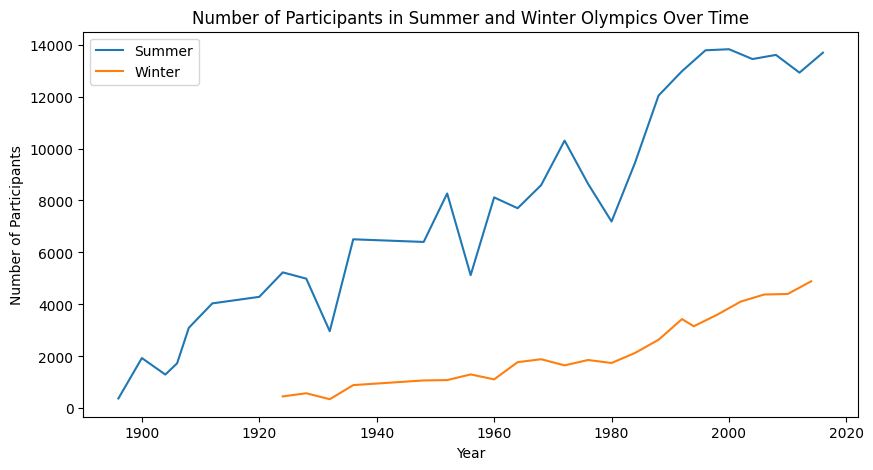

In [ ]:
# line graph of number of participants in summer and winter olympics over time
summer = df[df['Season'] == 'Summer'].groupby('Year').count()['ID']
winter = df[df['Season'] == 'Winter'].groupby('Year').count()['ID']
plt.figure(figsize=(10, 5))
plt.plot(summer, label='Summer')
plt.plot(winter, label='Winter')
plt.title('Number of Participants in Summer and Winter Olympics Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Participants')
plt.legend()
plt.show()

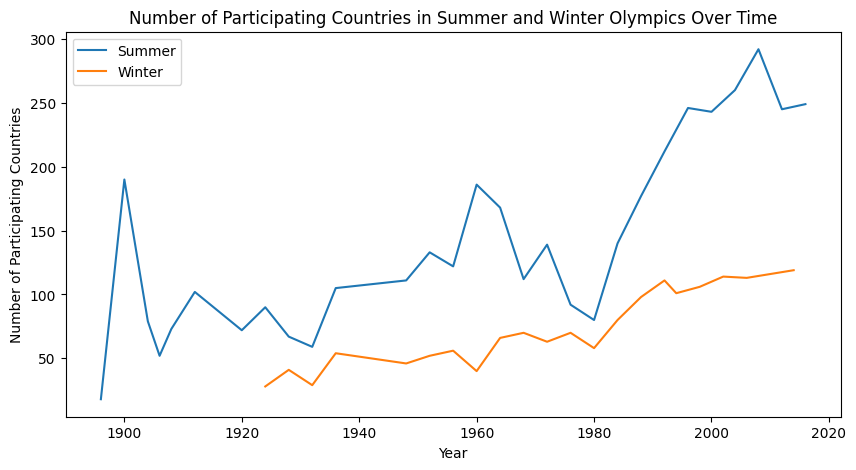

In [ ]:
# line graph of participating countries in summer and winter olympics over time
summer = df[df['Season'] == 'Summer'].groupby('Year').nunique()['Team']
winter = df[df['Season'] == 'Winter'].groupby('Year').nunique()['Team']
plt.figure(figsize=(10, 5))
plt.plot(summer, label='Summer')
plt.plot(winter, label='Winter')
plt.title('Number of Participating Countries in Summer and Winter Olympics Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Participating Countries')
plt.legend()
plt.show()

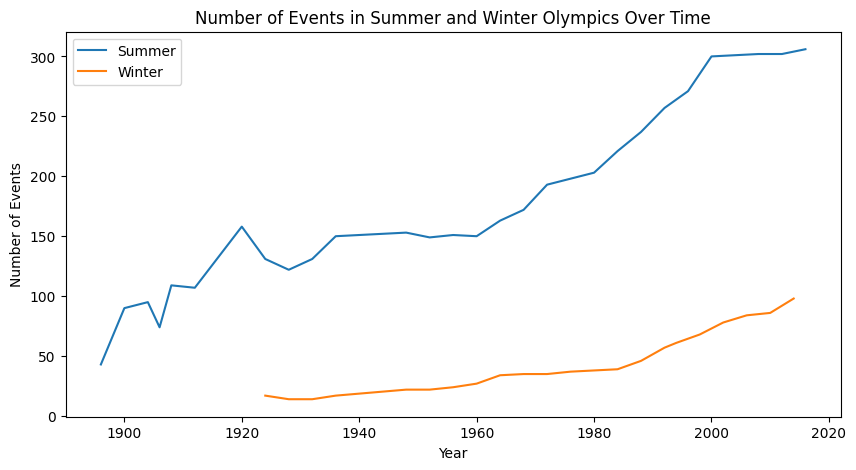

In [ ]:
# line graph of number of events in summer and winter olympics over time
summer = df[df['Season'] == 'Summer'].groupby('Year').nunique()['Event']
winter = df[df['Season'] == 'Winter'].groupby('Year').nunique()['Event']
plt.figure(figsize=(10, 5))
plt.plot(summer, label='Summer')
plt.plot(winter, label='Winter')
plt.title('Number of Events in Summer and Winter Olympics Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.legend()
plt.show()

You can see two long periods without any Games between 1912-1920 and 1936-1948, corresponding to WWI and WWII. In addition, a few Games are highlighted where dips occur in one or more of the plots:
<ul>
<li>
L.A., 1932: Attendance dipped because these Games occured in the midst of the Great Depression and in a remote location, such that many athletes were unable to afford the trip to the Olympics.
</li>
<li>
Melbourne, 1956: Attendance dipped due to several boycotts: Iraq, Egypt, and Lebanon did not participate due to the involvement of France and Britain in the Suez Crisis; the Netherlands, Spain, Switzerland, and Cambodia did not participate due to the Soviet Union’s beat down of the Hungarian Revolution; and China did not participate in protest of the IOC’s recognition of Taiwan.
</li>
<li>
Montreal, 1976: Attendance dipped because 25 nations, mostly African, boycotted the Games in reponse to apartheid policies in South Africa. Attendance at the 1980 Winter Olympics in Lake Placid wasn’t affected much since African nations have a limited presence at the Winter Games.
</li>
<li>
Moscow, 1980: Attendance dipped because 66 nations, including the U.S., boycotted the Games in response to the Soviet invasion of Afghanistan.
</li>
</ul>
The growth levels off around the year 2000, at least for the Summer Games. The list of events and athletes cannot grow indefinitely, and the Summer Games may have reached a saturation point near the turn of the century, with around 300 events and 10,000 athletes. The Winter Games would seem to have more growing room, but ice and snow sports are not practical or popular in most nations, and that doesn’t seem likely to change soon.

## Art Competitions ##
The 'Art Competitions' were included in the Olympics from 1912 to 1948, and included events in 5 disciplines: Architecture, Scupting, Painting, Literature, and Music. Medals were awarded to artists just like any other Olympic competition. The ideal of including sport-inspired art alongside athletic competitions was always part of the vision that Pierre de Coubertin, founder of the modern Olympics, had for the Games. He envisioned the Olympics as a multi-cultural celebration that showcased the educational value of amateur athletics for young men

### Number of events, nations and artists over time ###

In [ ]:
# dataframe for art competitions
art = df[df['Sport'] == 'Art Competitions']
art.head()

ID                   Name Sex   Age  Height  Weight     Team  NOC  \
58     19  Win Valdemar Aaltonen   M  54.0     NaN     NaN  Finland  FIN   
669   389      Adolf Gaston Abel   M  45.0     NaN     NaN  Germany  GER   
670   389      Adolf Gaston Abel   M  45.0     NaN     NaN  Germany  GER   
1203  677  Georges Achille-Fould   F  55.0     NaN     NaN   France  FRA   
1251  704     Dsir Antoine Acket   M  27.0     NaN     NaN  Belgium  BEL   

            Games  Year  Season         City             Sport  \
58    1948 Summer  1948  Summer       London  Art Competitions   
669   1928 Summer  1928  Summer    Amsterdam  Art Competitions   
670   1928 Summer  1928  Summer    Amsterdam  Art Competitions   
1203  1924 Summer  1924  Summer        Paris  Art Competitions   
1251  1932 Summer  1932  Summer  Los Angeles  Art Competitions   

                                                  Event Medal  
58    Art Competitions Mixed Sculpturing, Unknown Event   NaN  
669   Art Competitions Mixed Architecture, Designs F...   NaN  
670   Art Competitions Mixed Architecture, Architect...   NaN  
1203                    Art Competitions Mixed Painting   NaN  
1251     Art Competitions Mixed Painting, Unknown Event   NaN

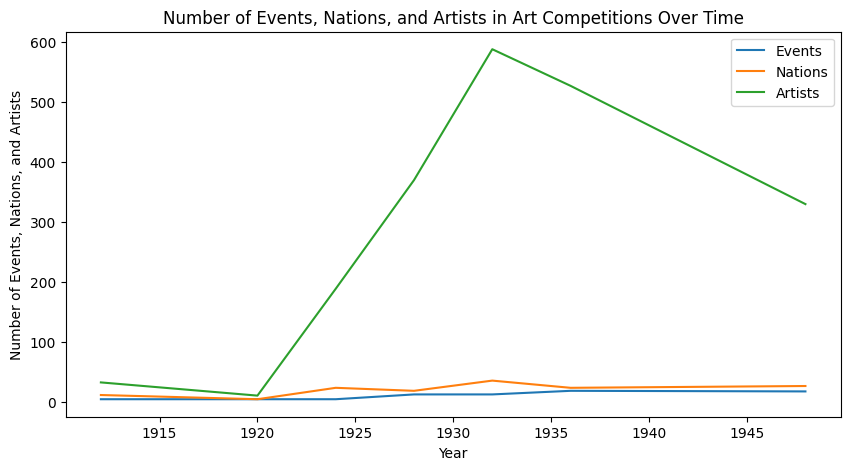

In [ ]:
# plotting events nations and artists over time on different
plt.figure(figsize=(10, 5))
plt.plot(art.groupby('Year').nunique()['Event'], label='Events')
plt.plot(art.groupby('Year').nunique()['Team'], label='Nations')
plt.plot(art.groupby('Year').nunique()['Name'], label='Artists')
plt.title('Number of Events, Nations, and Artists in Art Competitions Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Events, Nations, and Artists')
plt.legend()
plt.show()

### Analysis of countries in art competitions ###

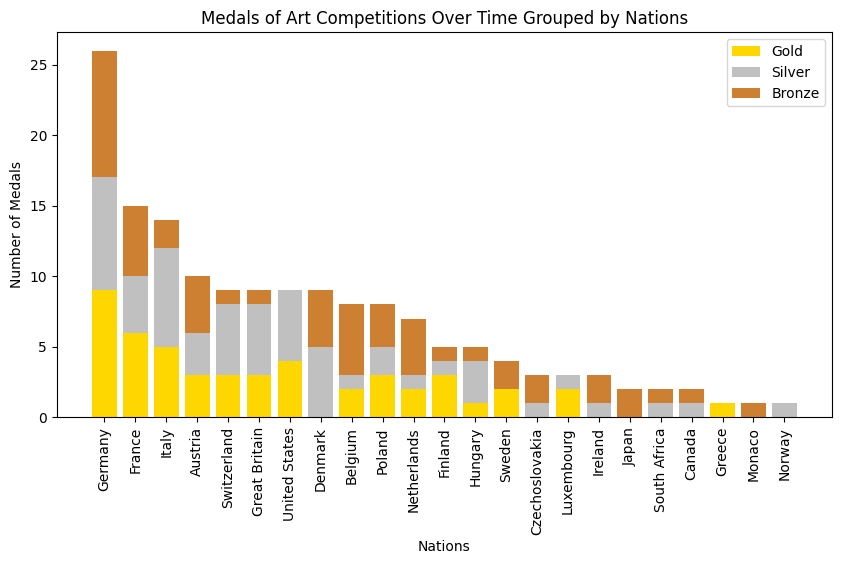

In [ ]:
# bar plot medals of art competitions over time grouped by nations and color coding them by gold, silver, and bronze
ndf = art.groupby(['Team', 'Medal']).count()['ID'].unstack().fillna(0)
# ordering the nations by the number of medals they have won
ndf['Total'] = ndf['Bronze'] + ndf['Silver'] + ndf['Gold']
ndf = ndf.sort_values('Total', ascending=False)
# plotting the bar plot
plt.figure(figsize=(10, 5))
plt.bar(ndf.index, ndf['Gold'], label='Gold', color='gold')
plt.bar(ndf.index, ndf['Silver'], bottom=ndf['Gold'], label='Silver', color='silver')
plt.bar(ndf.index, ndf['Bronze'], bottom=ndf['Gold'] + ndf['Silver'], label='Bronze', color='#cd7f32')
plt.title('Medals of Art Competitions Over Time Grouped by Nations')
plt.xlabel('Nations')
plt.ylabel('Number of Medals')
plt.xticks(rotation=90)
plt.legend()
plt.show()

Out of 50 nations that participated in the Art Competitions, fewer than half won a medal, and over a third of all medals were awarded to artists representing just three countries: Germany, France, and Italy.<br>

It is remarkable that Germany won the most medals in the Art Competitions between 1912 and 1948, considering that <strong>Germany was not invited to participate in 3 of the 7 Olympics during this period (they were banned from the 1920, 1924, and 1948 Olympics due to post-war politics)</strong>. However, Germany made up for these absences with an especially strong showing at the 1936 Berlin Olympics, a.k.a., the Nazi Olympics, in which they won 40% of the medals in the Art Competitions and 60% of all the Art Competition medals in the country’s history.

### Nazi dominance of 1936 Art Competitions

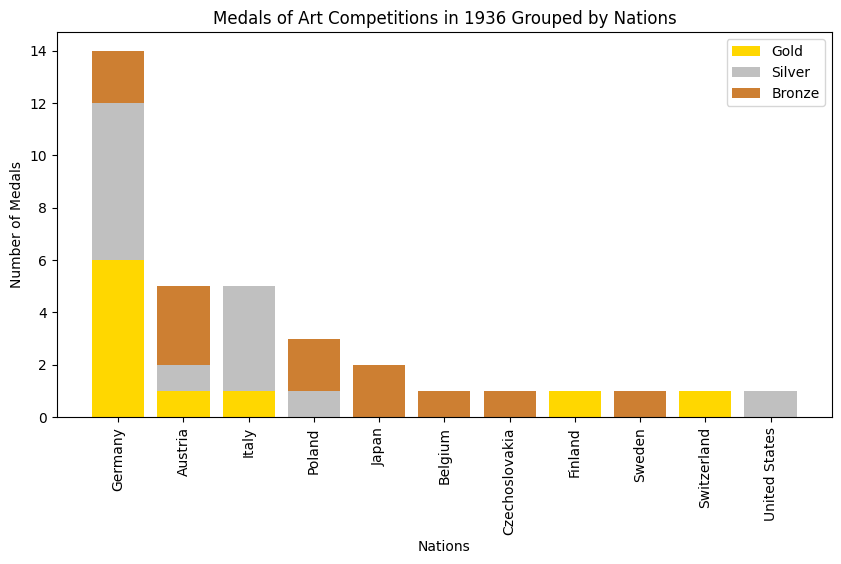

In [ ]:
# plotting the bar plot of art competitions for the 1936 Olympics grouped by nations and color coding them by gold, silver, and bronze
ndf1 = art[art['Year'] == 1936].groupby(['Team', 'Medal']).count()['ID'].unstack().fillna(0)
# ordering the nations by the number of medals they have won
ndf1['Total'] = ndf1['Bronze'] + ndf1['Silver'] + ndf1['Gold']
ndf1 = ndf1.sort_values('Total', ascending=False)
# plotting the bar plot
plt.figure(figsize=(10, 5))
plt.bar(ndf1.index, ndf1['Gold'], label='Gold', color='gold')
plt.bar(ndf1.index, ndf1['Silver'], bottom=ndf1['Gold'], label='Silver', color='silver')
plt.bar(ndf1.index, ndf1['Bronze'], bottom=ndf1['Gold'] + ndf1['Silver'], label='Bronze', color='#cd7f32')
plt.title('Medals of Art Competitions in 1936 Grouped by Nations')
plt.xlabel('Nations')
plt.ylabel('Number of Medals')
plt.xticks(rotation=90)
plt.legend()
plt.show()

The unfortunate truth is that Nazi Germany managed to use the 1936 Olympics as a platform for pro-Nazi propoganda. This is a black mark on the history of the Olympics, since the International Olympic Committee supported Germany hosting the Games even though people around the world were ringing the alarm bells that the Nazis were racist.<br>
The worst part is, the Nazis put on the best Olympics show ever. They even invented rituals such as the torch relay that we still include in the Olympics today.

### Number of Male and Female participants over time ###

<AxesSubplot: xlabel='Year', ylabel='M'>

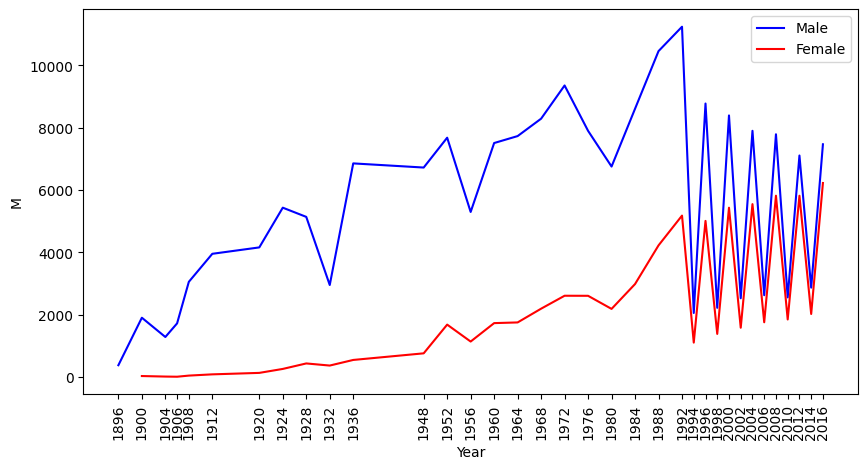

In [ ]:
# male vs female participants over the years
gender_count = df.groupby(['Year', 'Sex'])['Name'].count().unstack()
plt.figure(figsize=(10, 5))
plt.xticks(df['Year'].unique())
plt.xticks(rotation=90)
sns.lineplot(x=gender_count.index, y=gender_count['M'], color='blue', label='Male')
sns.lineplot(x=gender_count.index, y=gender_count['F'], color='red', label='Female')

The founder of the modern Olympics, Pierre de Coubertin, held a number of opinions that are at odds with the contemporary “Olympic movement”. Perhaps most famously, he strongly disapproved of women competing in the Olympics, calling the idea "impractical, uninteresting, unaesthetic, and incorrect". Despite resistance from many directions, women have turned up to compete in every Olympic Games aside from the first in Athens, 1896.<br>

Growth in the number of female athletes largely mirrored growth in the number of male athletes up until 1996, when growth in the number of male athletes leveled off at ~8000, while the number of female athletes continued to grow at a high rate. The participation of female athletes reached its highest point during the most recent Olympiad (Sochi 2014 and Rio 2016), in which slightly more than 44% of Olympians were women.

## Analysis of Physical attributes of Particpants ##
### Age ###

C:\Users\rsahi\AppData\Local\Temp\ipykernel_14604\612802918.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




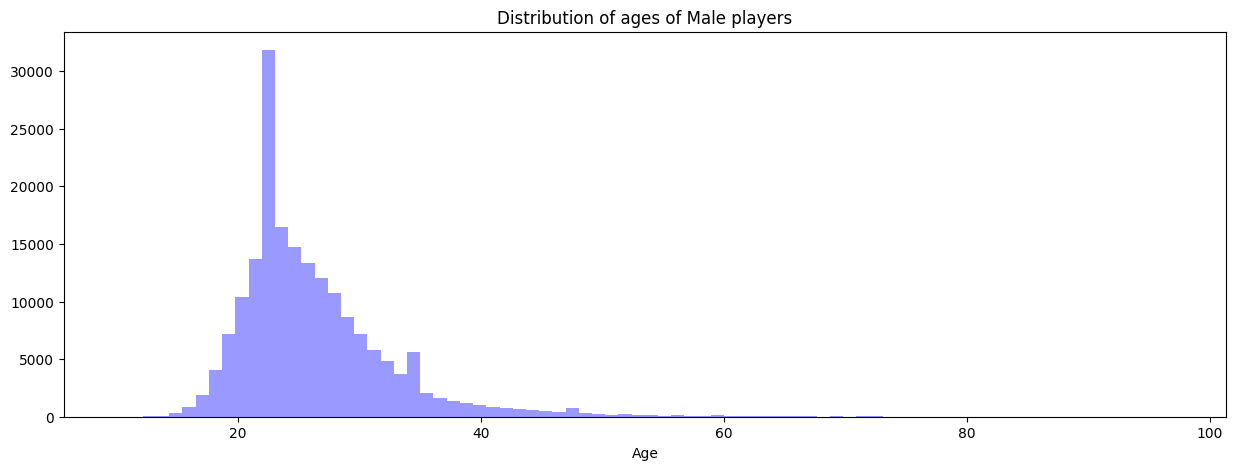

C:\Users\rsahi\AppData\Local\Temp\ipykernel_14604\612802918.py:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




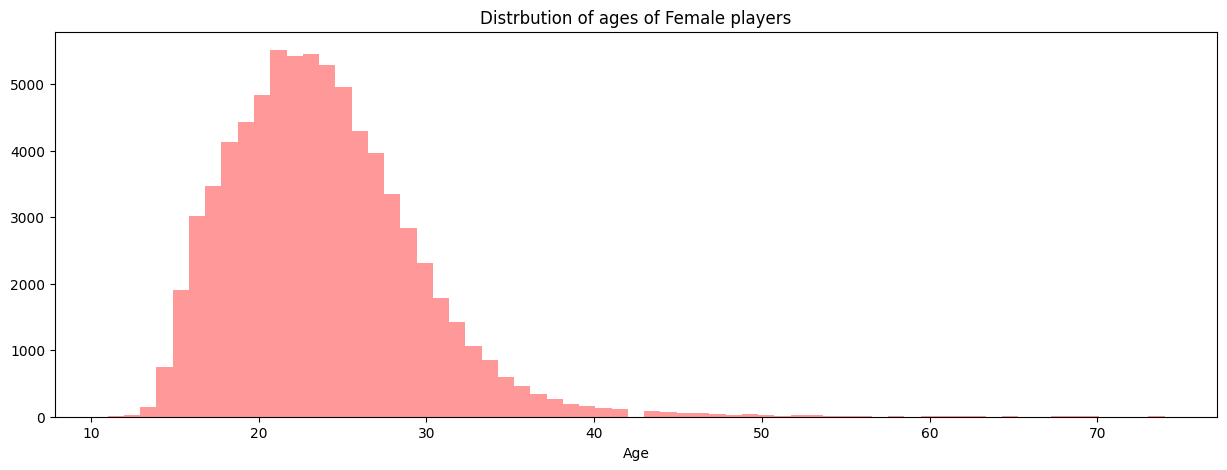

In [ ]:
# plotting the distribution of ages of male and female athletes
plt.figure(figsize=(15, 5))
m = df[df.Sex=='M']
plt.title('Distribution of ages of Male players')
sns.distplot(m.Age.dropna(), bins=80, kde=False, color='blue')
plt.show()
f = df[df.Sex=='F']
plt.figure(figsize=(15, 5))
plt.title('Distrbution of ages of Female players')
sns.distplot(f.Age.dropna(), bins=65, kde=False, color='red')
plt.show()

Based on the data available we can say that most of the athletes we have are young, with max altheletes aged around 24. Most of the athletes are aged between 20-30, this is because 20-30 is the age range in which most of the athletes are in the prime shapes of their lives

### Height ###

C:\Users\rsahi\AppData\Local\Temp\ipykernel_14604\782312617.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




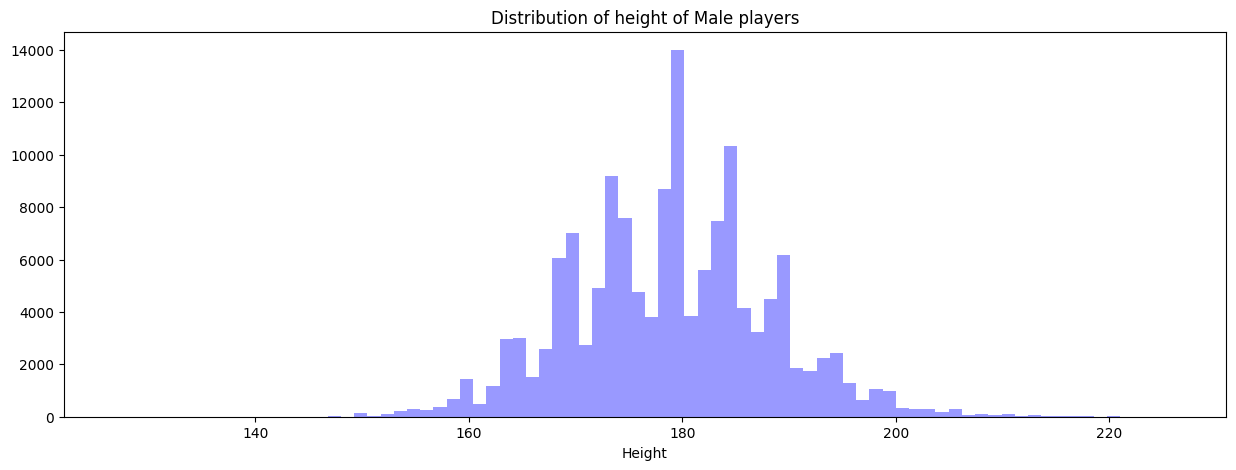

C:\Users\rsahi\AppData\Local\Temp\ipykernel_14604\782312617.py:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




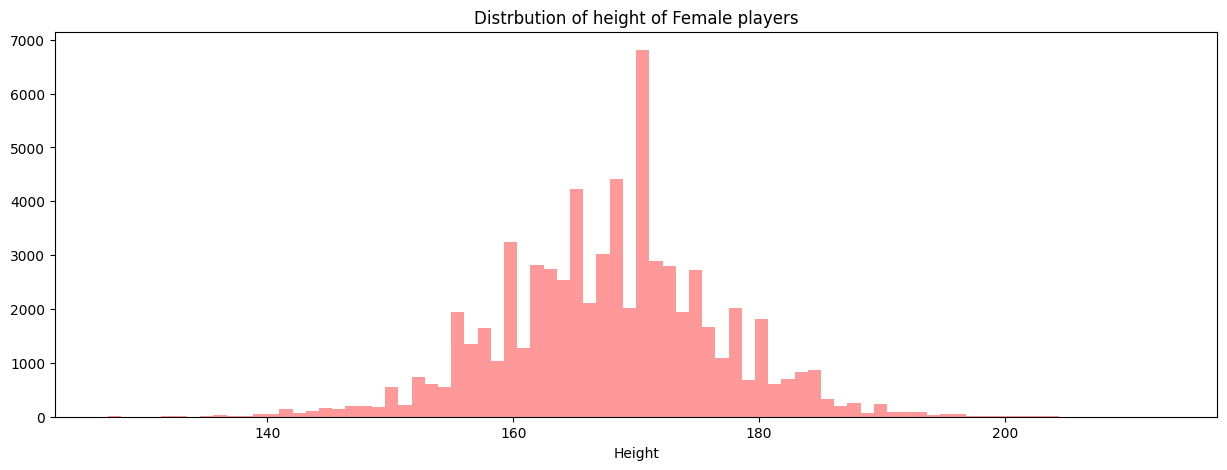

In [ ]:
# plotting the distribution of height of male and female athletes
plt.figure(figsize=(15, 5))
plt.title('Distribution of height of Male players')
sns.distplot(m.Height.dropna(), bins=80, kde=False, color='blue')
plt.show()
plt.figure(figsize=(15, 5))
plt.title('Distrbution of height of Female players')
sns.distplot(f.Height.dropna(), bins=80, kde=False, color='red')
plt.show()

The distribution of Heights of atheletes is almost normal with some spikes. As we can see these spiked values are either at 10s or 5s values These might be because of rounding off the values to nearest multiple of 5.

### Weight ###

C:\Users\rsahi\AppData\Local\Temp\ipykernel_14604\532203435.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




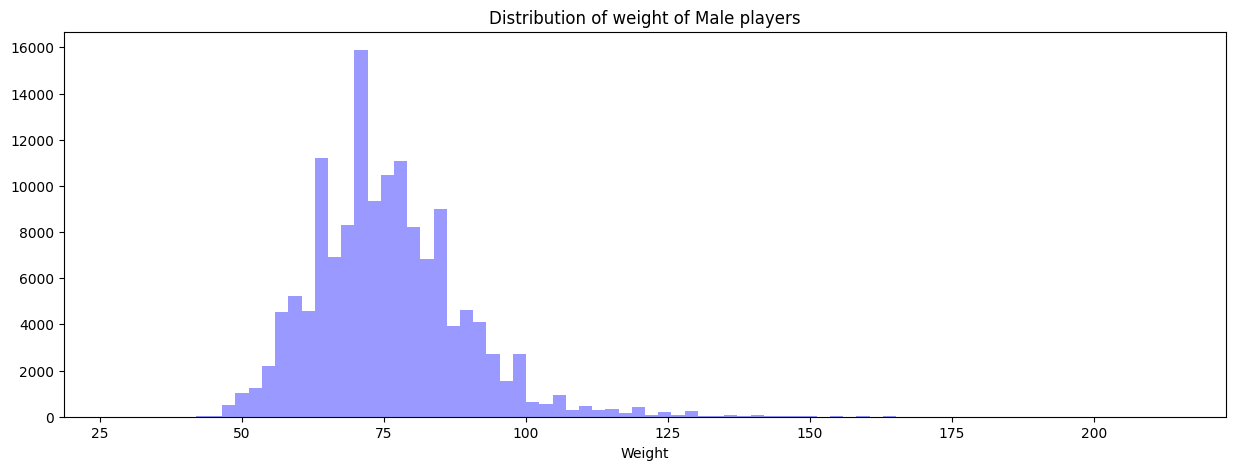

C:\Users\rsahi\AppData\Local\Temp\ipykernel_14604\532203435.py:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




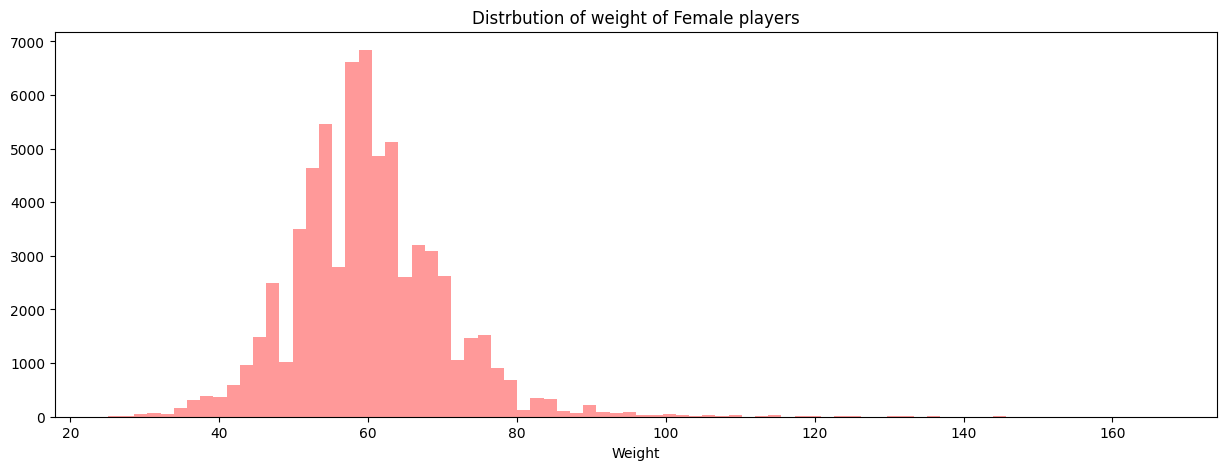

In [ ]:
# plotting the distribution of weight of male and female athletes
plt.figure(figsize=(15, 5))
plt.title('Distribution of weight of Male players')
sns.distplot(m.Weight.dropna(), bins=80, kde=False, color='blue')
plt.show()
plt.figure(figsize=(15, 5))
plt.title('Distrbution of weight of Female players')
sns.distplot(f.Weight.dropna(), bins=80, kde=False, color='red')
plt.show()

Most of the weight values lie between 40 and 100. The ones on the left and right of these are due to the fact that there were players of age group 10-15 who have not yet grown to their full height and weight. Also in certain sports there are weight categories and thus we see some values where weights are over 100.

In [ ]:
line_colors=[ "#14cc60","#036d19","#09a129"]
fig = px.box(df, x="Year", y="Age",title="<b>The Overall Trend Of Athelete's Age</b>",color_discrete_sequence=line_colors,template = "none")
fig.update_layout(plot_bgcolor = " whitesmoke"
                 )
fig.show()

In [ ]:
medal_df=df[df['Medal']=="Gold"].groupby(["Team"]).count().sort_values(by='ID', ascending=False).reset_index()
medal_df.head(10).style.background_gradient(cmap='Greens',axis=0)

In [ ]:
line_colors = ["#0a2e36", "#27FB6B","#14cc60","#036d19","#09a129"]
gold_plot = px.pie(medal_df.head(10), values='ID',hole=0.6, names='Team', title='<b>Top 10 Gold Winning Nations</b>',color_discrete_sequence=line_colors,template = "none")
fig.update_layout(plot_bgcolor = " whitesmoke")
gold_plot.show()

In [ ]:
silvermedal_df=df[df['Medal']=="Silver"].groupby(["Team"]).count().sort_values(by='ID', ascending=False).reset_index()
silvermedal_df.head(10).style.background_gradient(cmap='Greens',axis=0)

In [ ]:
line_colors = ["#0a2e36", "#27FB6B","#14cc60","#036d19","#09a129"]
silver_plot = px.pie(silvermedal_df.head(10), values='ID',hole=0.6, names='Team', title='<b>Top 10 Silver Winning Nations</b>',color_discrete_sequence=line_colors,template = "none")
silver_plot.show()

In [ ]:
bronzemedal_df=df[df['Medal']=="Bronze"].groupby(["Team"]).count().sort_values(by='ID', ascending=False).reset_index()
bronzemedal_df.head(11).style.background_gradient(cmap='Greens',axis=0)

In [ ]:
line_colors = ["#0a2e36", "#27FB6B","#14cc60","#036d19","#09a129"]
bronze_plot = px.pie(bronzemedal_df.head(10), values='ID',hole=0.6, names='Team', title='<b>Top 10 Bronze Winning Nations</b>',color_discrete_sequence=line_colors,template = "none")
bronze_plot.show()

In [ ]:
top_male_data = dict(
    name=["Michael Phelps", "Nikolay Andrianov", "Borys Shakhlin",'Takashi Ono','Edoardo Mangiarotti'],
    country=["USA","Soviet Union","Soviet Union","Japan","Italy"],
    parent=["Swimming", "Gymnastics", "Gymnastics", "Gymnastics", "Fencing"],
    value=[28, 15, 13, 13, 13])
line_colors = ["#0a2e36", "#27FB6B","#14cc60","#036d19","#09a129"]
fig = px.sunburst(top_male_data, path=['parent', 'country','name'], values='value',color_discrete_sequence=line_colors,template = "none")
                 
fig.show()

Inference:
The top 3 male performers are namely Michael Phelps(USA), Nikolay Andrianov (Soviet Union) and Borys Shakhlin (Soviet Union) respectively.
While the latter two athletes belonged to the era of the cold-war, Michael Phillips is an athlete who contested in the recent years post the collapse of the Soviet Union.
It is quite amazing that these athletes have individuallly won more medals than many countries like India, 
Indonesia, Nepal and most of the African and South American Nations.

In [ ]:
top_female_data = dict(
    name=["Larysa Semenivna Latynina", "Jennifer Elisabeth Thompson", "Dara Grace Torres",'Natalie Anne','Birgit Fischer'],
    parent=["Gymnastics", "Swimming", "Swimming", "Swimming","Gymnastics"],
    country=["Soviet Union", "United States", "United States", "United States","Czechoslovakia"],
    value=[18, 12, 12, 12, 11])
line_colors = ["#0a2e36", "#27FB6B","#14cc60","#036d19","#09a129"]
fig = px.sunburst(top_female_data, path=['parent', 'country','name'], values='value',title="<b>Top 3 Female Athlete's By The Number Of Medals Across All Sports</b>",color_discrete_sequence=line_colors,template = "none")
fig.update_layout(plot_bgcolor = " whitesmoke")
fig.show()

Infernces:
The top 3 female performers are namely Larissa Semyonovna (Soviet Union),Jennifer Elisabeth Thompson (USA) and Dara Grace Torres (USA) respectively.
Similar to their male counterparts, these athletes too have individually won more medals than most of the developing nations like India,Indonesia, Nepal and most of the African and South American Nations.